In [83]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [84]:
dataDir='/dl/data/cityscapes/cityscapes_ori/leftImg8bit'
# annDir ='/dl/data/cityscapes/4detectron/annotations/'
dataType='val'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
# annFile='/media/pesong/e/dl_gaussian/data/cityscapes/4detectron/annotations/instances_{}2017.json'.format(dataType)
annFile='/media/pesong/e/dl_gaussian/model/gaussian_dataset_api/convert_to_gaussian/test_cs/annotations/instances_{}2017.json'.format(dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [85]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format('.  '.join(nms))) 

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
road.  person.  rider.  car.  truck.  bus.  motorcycle.  bicycle



[11]
1
1
frankfurt_000000_000294_leftImg8bit.png


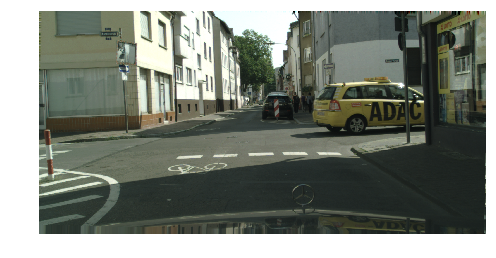

In [96]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds = [1])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(len(imgIds))
print(str(img['id']))

# load and display image
print(img['file_name'])
dirName = str(img['file_name']).split('_')[0]
I = io.imread('%s/%s/%s/%s'%(dataDir,dataType,dirName,img['file_name']))
# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[11, 11]


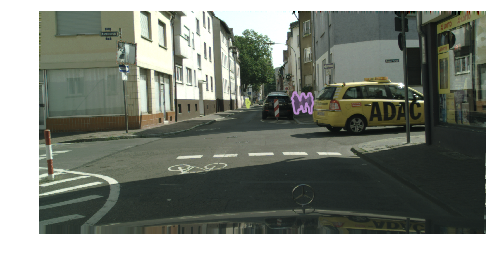

In [97]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
print([ann['category_id'] for ann in anns])
# print([ann['bbox'] for ann in anns ])

coco.showAnns(anns)